In [1]:
#Распознавание рукописных цифр
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [2]:
# Импортируйте необходимые пакеты
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time

In [3]:
import os
from google.colab import drive

In [4]:

### Запустите эту ячейку

from torchvision import datasets, transforms

# Определите преобразование для нормализации данных
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Скачивайте и загружайте обучающие данные
trainset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=True, transform=transform)
valset = datasets.MNIST('drive/My Drive/mnist/MNIST_data/', download=True, train=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 122883996.67it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 20092170.15it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 36365933.46it/s]


Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 3809343.88it/s]

Extracting drive/My Drive/mnist/MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to drive/My Drive/mnist/MNIST_data/MNIST/raw



In [12]:
dataiter = iter(trainloader)
#images, labels = dataiter.next()

images, labels = next(iter(trainloader))
#images.resize_(64, 784)

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


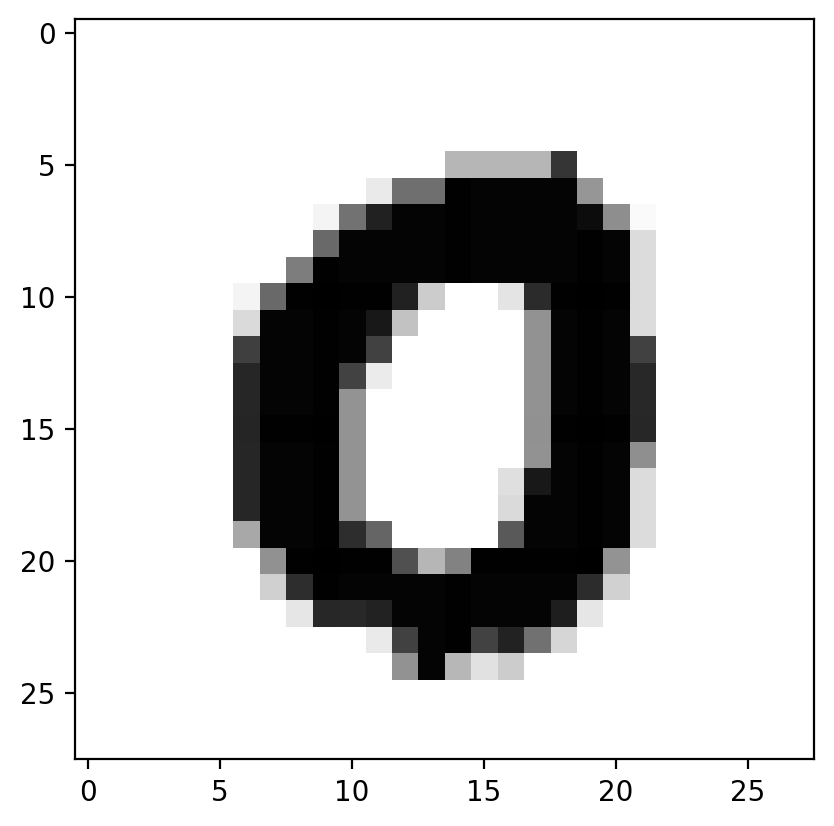

In [13]:
plt.imshow(images[0].numpy().squeeze(), cmap='gray_r');

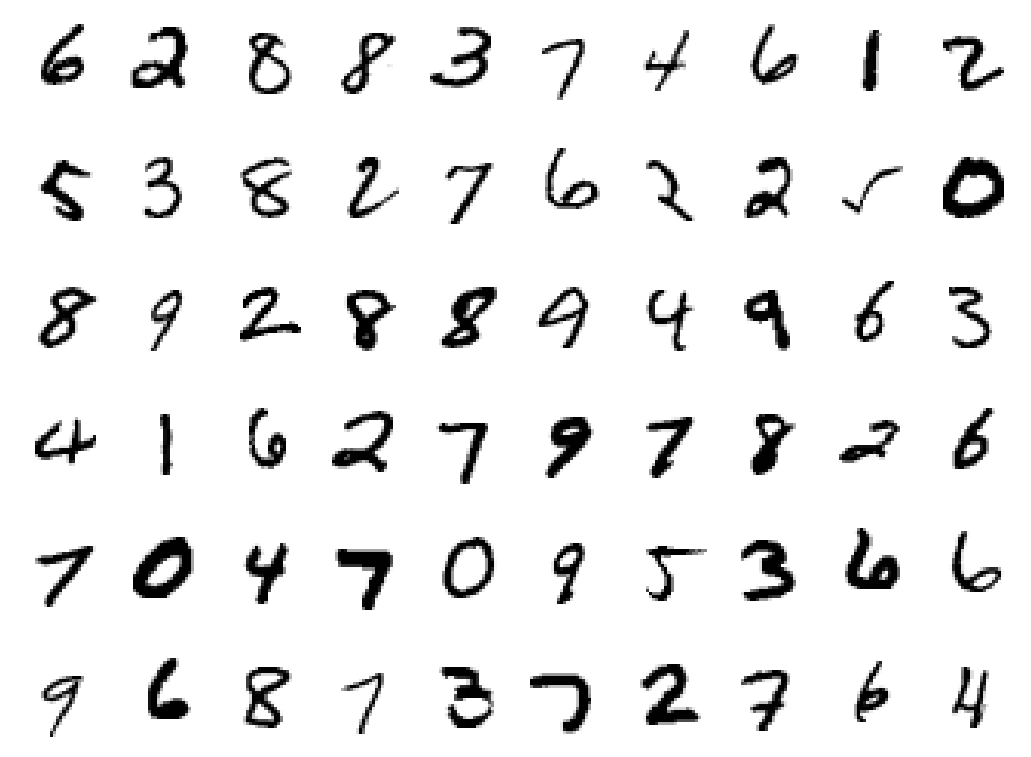

In [14]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

In [15]:
from torch import nn

# Сведения о слое для нейронной сети
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Создайте сеть прямой связи
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [16]:

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

logps = model(images)
loss = criterion(logps, labels)

In [17]:

print('Before backward pass: \n', model[0].weight.grad)

loss.backward()

print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0010,  0.0010,  0.0010,  ...,  0.0010,  0.0010,  0.0010],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        ...,
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0002, -0.0002, -0.0002,  ..., -0.0002, -0.0002, -0.0002],
        [ 0.0036,  0.0036,  0.0036,  ...,  0.0036,  0.0036,  0.0036]])


In [18]:
from torch import optim

# Оптимизаторам требуются параметры для оптимизации и скорость обучения
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [19]:
print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Очистите градиенты, сделайте это, потому что градиенты накапливаются
optimizer.zero_grad()

# Прямой проход, затем обратный проход, затем обновление весов
output = model(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0130, -0.0112,  0.0104,  ...,  0.0347, -0.0297,  0.0102],
        [ 0.0290, -0.0226, -0.0106,  ...,  0.0309,  0.0251, -0.0134],
        [ 0.0214,  0.0098,  0.0043,  ...,  0.0318,  0.0064, -0.0186],
        ...,
        [-0.0225,  0.0104,  0.0272,  ..., -0.0241,  0.0028, -0.0188],
        [ 0.0092, -0.0202,  0.0027,  ..., -0.0130,  0.0335, -0.0217],
        [-0.0289,  0.0213, -0.0249,  ..., -0.0354,  0.0113, -0.0229]],
       requires_grad=True)
Gradient - tensor([[ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [-0.0044, -0.0044, -0.0044,  ..., -0.0044, -0.0044, -0.0044],
        ...,
        [ 0.0003,  0.0003,  0.0003,  ...,  0.0003,  0.0003,  0.0003],
        [ 0.0022,  0.0022,  0.0022,  ...,  0.0022,  0.0022,  0.0022],
        [-0.0003, -0.0003, -0.0003,  ..., -0.0003, -0.0003, -0.0003]])


In [20]:
# Выполните шаг обновления и установите новые веса
optimizer.step()
print('Updated weights - ', model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0130, -0.0112,  0.0104,  ...,  0.0347, -0.0297,  0.0102],
        [ 0.0290, -0.0226, -0.0106,  ...,  0.0309,  0.0251, -0.0134],
        [ 0.0214,  0.0099,  0.0044,  ...,  0.0318,  0.0064, -0.0186],
        ...,
        [-0.0225,  0.0104,  0.0272,  ..., -0.0241,  0.0028, -0.0188],
        [ 0.0092, -0.0203,  0.0027,  ..., -0.0131,  0.0335, -0.0217],
        [-0.0289,  0.0213, -0.0249,  ..., -0.0354,  0.0113, -0.0229]],
       requires_grad=True)


In [21]:
optimizer = optim.SGD(model.parameters(), lr=0.003, momentum=0.9)
time0 = time()
epochs = 15
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # Сгладьте изображения MNIST в вектор длиной 784
        images = images.view(images.shape[0], -1)
    
        # Пропуск на обучение
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #Именно здесь модель обучается путем обратного распространения
        loss.backward()
        
        #И оптимизирует свои веса здесь
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.6275380775650173
Epoch 1 - Training loss: 0.279332958328635
Epoch 2 - Training loss: 0.21619247380238987
Epoch 3 - Training loss: 0.17255839634575507
Epoch 4 - Training loss: 0.14391629532305225
Epoch 5 - Training loss: 0.12219181690992577
Epoch 6 - Training loss: 0.10659154547777559
Epoch 7 - Training loss: 0.09581329531943811
Epoch 8 - Training loss: 0.08482435534694302
Epoch 9 - Training loss: 0.0765673332879427
Epoch 10 - Training loss: 0.06926081336782511
Epoch 11 - Training loss: 0.06398304500656803
Epoch 12 - Training loss: 0.058480489291628
Epoch 13 - Training loss: 0.05518848583105205
Epoch 14 - Training loss: 0.04993655881819639

Training Time (in minutes) = 5.008182934919993


In [23]:
def view_classify(img, ps):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    ax2.set_yticklabels(np.arange(10))
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)
    plt.tight_layout()

Predicted Digit = 0


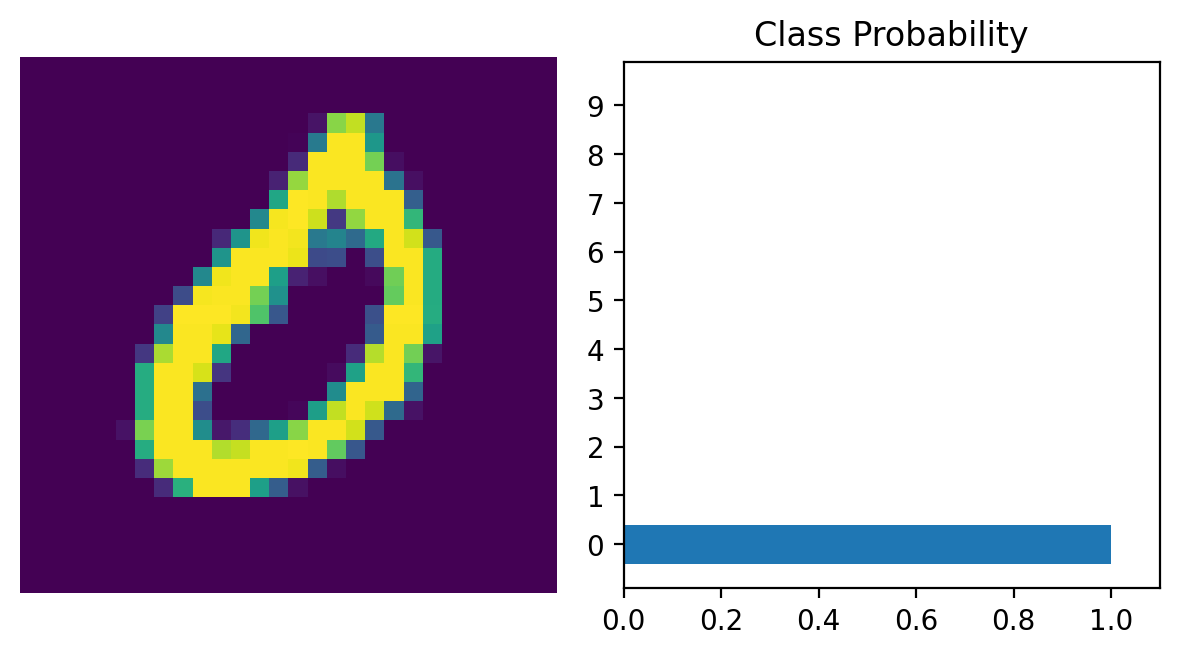

In [24]:
images, labels = next(iter(valloader))

img = images[0].view(1, 784)
# Отключите градиенты, чтобы ускорить выполнение этой части
with torch.no_grad():
    logps = model(img)

# Выходные данные сети представляют собой логарифмические вероятности, для вероятностей необходимо использовать экспоненциальный показатель
ps = torch.exp(logps)
probab = list(ps.numpy()[0])
print("Predicted Digit =", probab.index(max(probab)))
view_classify(img.view(1, 28, 28), ps)

In [25]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    # Отключите градиенты, чтобы ускорить выполнение этой части
    with torch.no_grad():
        logps = model(img)

    # Выходные данные сети представляют собой логарифмические вероятности, для вероятностей необходимо использовать экспоненциальный показатель
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9754
